In [178]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [179]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
Transactions = pd.read_excel('KPMG.xlsx', 'Transactions')
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [180]:
# in ra info bảng
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [181]:
# describe default
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [182]:
# describe các biến object
Transactions.describe(include=[object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [183]:
# describe all
Transactions.describe(include='all', datetime_is_numeric=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [184]:
# count số dòng bị null ở mỗi cột
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [185]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df1_dropna_all = Transactions.dropna()
df1_dropna_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [186]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df1_dropna_online_order = Transactions.dropna(subset=['online_order'])
df1_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [187]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df1_fillna_0 = Transactions.fillna(0)
df1_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [188]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df1_fillna_ffill = Transactions.fillna(method='ffill')
df1_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [189]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df1_fillna_bfill = Transactions.fillna(method='bfill')
df1_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [190]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
CustomerDemographic = pd.read_excel('KPMG.xlsx', 'CustomerDemographic')
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])
CustomerDemographic.head(5)

C:\Users\DO THU TRANG\AppData\Local\Temp\ipykernel_9896\1297101032.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG.xlsx', 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [191]:
# in ra info bảng
CustomerDemographic.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [192]:
# describe các giá trị object
CustomerDemographic.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [193]:
# Remove all NA rows, then use output for the following steps
df2_dropna_all = CustomerDemographic.dropna()
df2_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [194]:
# In ra các giá trị unique của cột gender
print(df2_dropna_all['gender'].unique())

['F' 'Male' 'Female' 'Femal']


In [195]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
df2_dropna_all.loc[df2_dropna_all['gender'] == 'F', "gender"] = 'Female'
df2_dropna_all.loc[df2_dropna_all['gender'] == 'Femal', "gender"] = 'Female'
print(df2_dropna_all['gender'].unique())

['Female' 'Male']


In [196]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df2a_dropna_all = df2_dropna_all
df2a_dropna_all['age'] = df2_dropna_all['DOB'].apply(calculate_age)
df2_dropna_all['age'].agg([min, max])

C:\Users\DO THU TRANG\AppData\Local\Temp\ipykernel_9896\3493060388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2a_dropna_all['age'] = df2_dropna_all['DOB'].apply(calculate_age)


min    20
max    91
Name: age, dtype: int64

In [197]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
bins = [0, 35, 56, 200]
labels = ['Young', 'Middle', 'Older']
df2_dropna_all['age_group'] = pd.cut(df2_dropna_all['age'], bins=bins, right=False, labels=labels)
df2_dropna_all

C:\Users\DO THU TRANG\AppData\Local\Temp\ipykernel_9896\586357012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dropna_all['age_group'] = pd.cut(df2_dropna_all['age'], bins=bins, right=False, labels=labels)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68,Older
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,49,Middle
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,34,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,á,No,10.0,47,Middle
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,-100,No,12.0,33,Young
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0,46,Middle
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,47,Middle


# 2. Data Completeness

In [198]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)


In [199]:
transactions_demographic = df1_dropna_all.merge(df2_dropna_all, on='customer_id', how='left')
transactions_demographic[transactions_demographic['first_name'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19989,0,714,2017-04-27,1.0,Approved,Norco Bicycles,Standard,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,19992,11,1374,2017-09-14,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19993,13,5,2017-04-28,0.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,19994,77,2618,2017-12-23,0.0,Approved,Norco Bicycles,Road,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation (after dropping null values)

In [200]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
transactions_demographic['customer_id'].nunique()

3492

In [201]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
transactions_demographic['year_month'] = transactions_demographic['transaction_date'].dt.strftime('%Y-%m')
transactions_demographic.groupby('year_month')['customer_id'].nunique()

year_month
2017-01    1321
2017-02    1258
2017-03    1277
2017-04    1284
2017-05    1281
2017-06    1238
2017-07    1327
2017-08    1346
2017-09    1240
2017-10    1378
2017-11    1281
2017-12    1294
Name: customer_id, dtype: int64

In [202]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
transactions_demographic['gross_margin'] = transactions_demographic['list_price'] - transactions_demographic['standard_cost']
transactions_demographic.groupby('year_month')['gross_margin'].agg([min, max, sum, 'mean'])

,min,max,sum,mean
year_month,,,,
2017-01,4.8,1702.55,915151.359988,560.068152
2017-02,4.8,1702.55,852514.230000,540.249829
2017-03,4.8,1702.55,865312.550000,541.836287
2017-04,4.8,1702.55,888856.890000,551.058208
2017-05,4.8,1702.55,904003.210000,550.885564
2017-06,4.8,1702.55,841815.260000,547.700234
2017-07,4.8,1702.55,919677.790000,550.705263
2017-08,4.8,1702.55,951376.270000,558.647252
2017-09,4.8,1702.55,843736.130000,550.023553


In [203]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
print('So luong order:')
print(transactions_demographic.groupby(['online_order', 'order_status'])['transaction_id'].count())
print('----------------------------------')
print('Doanh thu:')
print(transactions_demographic.groupby(['online_order', 'order_status'])['gross_margin'].agg([min, max, sum, 'mean']))

So luong order:
online_order  order_status
0.0           Approved        9631
              Cancelled         75
1.0           Approved        9642
              Cancelled         97
Name: transaction_id, dtype: int64
----------------------------------
Doanh thu:
                             min      max           sum        mean
online_order order_status                                          
0.0          Approved       4.80  1702.55  5.344969e+06  554.975486
             Cancelled     15.08  1702.55  4.293074e+04  572.409867
1.0          Approved       4.80  1702.55  5.287680e+06  548.400743
             Cancelled      4.80  1702.55  5.323673e+04  548.832268


# 4. Data Visualization

In [293]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set1')

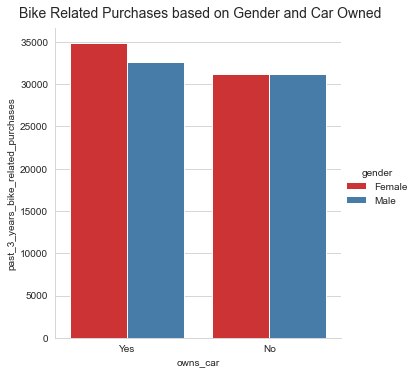

In [294]:
g1 = sns.catplot(x='owns_car', y='past_3_years_bike_related_purchases', data=df2_dropna_all, kind='bar', hue='gender', estimator=sum, ci=None)
g1.fig.suptitle('Bike Related Purchases based on Gender and Car Owned', y=1.03, fontsize=14)
plt.show()

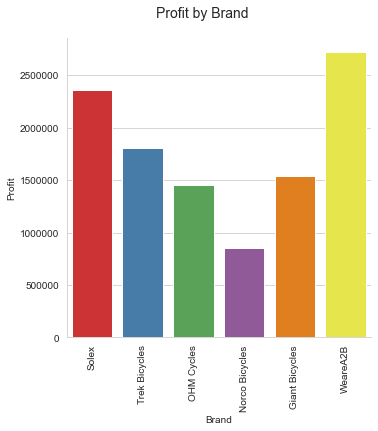

In [295]:
g2 = sns.catplot(x='brand', y='gross_margin', data=transactions_demographic, kind='bar',estimator=sum, ci=None)
g2.fig.suptitle('Profit by Brand', y=1.03, fontsize=14)
g2.set(xlabel= 'Brand', ylabel='Profit')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

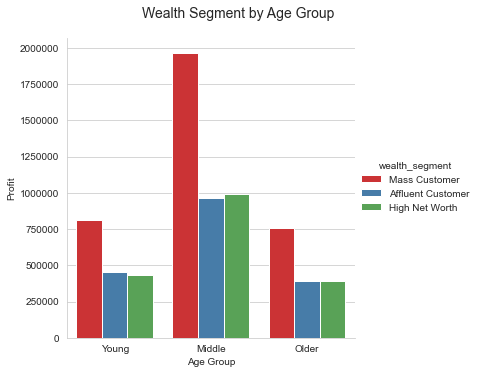

In [296]:
g3 = sns.catplot(x='age_group', y='gross_margin', data=transactions_demographic, kind='bar', hue='wealth_segment', estimator=sum, ci=None)
g3.fig.suptitle('Wealth Segment by Age Group', y=1.03, fontsize=14)
g3.set(xlabel= 'Age Group', ylabel='Profit')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

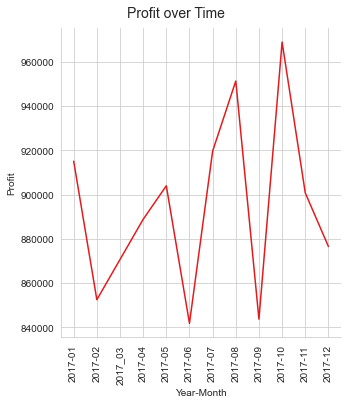

In [297]:
#transactions_demographic['year_month']=pd.to_datetime(transactions_demographic["year_month"], format="%Y-%m")
transactions_demographic['year_month'] = pd.Categorical(transactions_demographic['year_month'],
                                   categories=['2017-01', '2017-02', '2017_03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
                                   ordered=True)
g4 = sns.relplot(x='year_month', y='gross_margin', data=transactions_demographic, kind='line',estimator=sum, ci=None)
g4.fig.suptitle('Profit over Time', y=1.03, fontsize=14)
g4.set(xlabel= 'Year-Month', ylabel='Profit')
plt.xticks(rotation=90)
plt.show()

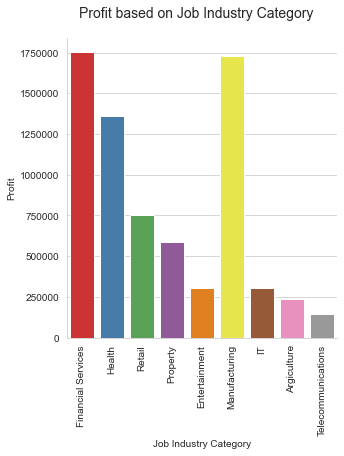

In [299]:
g5 = sns.catplot(x='job_industry_category', y='gross_margin', data=transactions_demographic, kind='bar', estimator=sum, ci=None)
g5.fig.suptitle('Profit based on Job Industry Category', y=1.03, fontsize=14)
g5.set(xlabel='Job Industry Category', ylabel='Profit')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()